 ## Crawling Artikel (Graph)

#### Nama  : Dohan Rizqi Hadityo
#### NIM : 210411100195
#### Kelas : Pencarian dan Penambangan Web

In [5]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import csv

# URL dari artikel sepak bola di IDN Times
url = 'https://www.idntimes.com/sport/soccer/sandy-firdaus/sebelum-gabung-timnas-indonesia-mees-hilgers-lawan-mourinho'

# Membuat permintaan ke URL
response = requests.get(url)

# Inisialisasi data yang akan disimpan
# Mengambil ulang dan membersihkan data yang diminta
artikel_mees = []

if response.status_code == 200:
    # Parsing halaman web
    soup = BeautifulSoup(response.text, 'html.parser')
    
    # Mengambil judul artikel
    title = soup.find('h1').get_text().strip()
    
    # Mengambil tanggal publikasi artikel dan membersihkan spasi berlebih
    date = soup.find('time').get_text().strip()
    
    # Mengambil isi artikel dengan membersihkan konten tambahan
    content = soup.find_all('p')
    article_text = '\n'.join([p.get_text().strip() for p in content if p.get_text().strip()])

    # Simpan data dalam bentuk dictionary yang telah dibersihkan
    artikel_mees.append({
        'Title': title,
        'Date': date,
        'Content': article_text
    })

# Membuat dataframe dari data yang telah dibersihkan
data_mees = pd.DataFrame(artikel_mees)

# Menampilkan dataframe yang bersih
data_mees


,Title,Date,Content
0,"Sebelum Gabung Timnas Indonesia, Mees Hilgers ...",03 Oct 24 | 17:36,Regional\nKategori\nEvent\nDOWNLOAD IDN APP SE...


In [7]:
import string
import pandas as pd
import numpy as np

In [9]:
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [11]:
# Proses case folding
def casefolding(Content):
    if isinstance(Content, list):
        # Jika Content adalah list, terapkan case folding pada setiap elemen
        return [str(item).lower() for item in Content]
    else:
        # Jika Content adalah string, langsung terapkan case folding
        return str(Content).lower()

# Terapkan fungsi casefolding pada kolom 'Content'
data_mees['Content'] = data_mees['Content'].apply(casefolding)

data_mees.head()


,Title,Date,Content
0,"Sebelum Gabung Timnas Indonesia, Mees Hilgers ...",03 Oct 24 | 17:36,regional\nkategori\nevent\ndownload idn app se...


In [13]:
csv_filename = "artikel_mees_hilgers.csv"
data_mees.to_csv(csv_filename, index=False, encoding='utf-8')

print(f"Data berita telah disimpan ke {csv_filename}")

Data berita telah disimpan ke artikel_mees_hilgers.csv


In [15]:
data_mees = pd.read_csv("artikel_mees_hilgers.csv", sep=',', encoding='latin1')
data_mees.head()

,Title,Date,Content
0,"Sebelum Gabung Timnas Indonesia, Mees Hilgers ...",03 Oct 24 | 17:36,regional\nkategori\nevent\ndownload idn app se...


In [17]:
def cleansing(Content):
    # Menghapus whitespace di awal dan akhir teks
    Content = Content.strip()
    
    # Menghapus tanda baca dan karakter khusus
    Content = re.sub(f"[{string.punctuation}]", '', Content)
    
    # Menghapus angka
    Content = re.sub(r'\d+', '', Content)
    
    # Menghapus huruf tunggal (opsional, tergantung kebutuhan)
    Content = re.sub(r"\b[a-zA-Z]\b", "", Content)
    
    # Menghapus karakter-karakter non-standar seperti â
    Content = re.sub(r'[^\x00-\x7F]+', '', Content)
    
    # Menghapus spasi ganda
    Content = re.sub(r'\s+', ' ', Content)
    
    return Content

# Terapkan fungsi cleansing pada kolom 'Content'
data_mees['Content'] = data_mees['Content'].apply(cleansing)

# Menampilkan 5 baris pertama
data_mees.head(5)


,Title,Date,Content
0,"Sebelum Gabung Timnas Indonesia, Mees Hilgers ...",03 Oct 24 | 17:36,regional kategori event download idn app sekar...


In [19]:
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize, word_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dohan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [20]:
import pandas as pd
from nltk.tokenize import sent_tokenize, word_tokenize  # Tambahkan ini

# Ekstraksi kalimat dari konten artikel
sentences = sent_tokenize(article_text)

# Tokenisasi tiap kalimat menjadi term
terms_per_sentence = [word_tokenize(sentence) for sentence in sentences]

# Membuat objek yang menyimpan hasil term dari setiap kalimat
extracted_terms = [{'Sentence': sentence, 'Terms': terms} for sentence, terms in zip(sentences, terms_per_sentence)]

# Menampilkan hasilnya sebagai dataframe
df_terms = pd.DataFrame(extracted_terms)

# Menampilkan dataframe
print(df_terms)


                                             Sentence  \
0   Regional\nKategori\nEvent\nDOWNLOAD IDN APP SE...   
1   Jakarta, IDN Times - Mees Hilgers akan menghad...   
2   Dia dijadwalkan akan bersua Fenerbahce, tim ya...   
3   Jadi, Twente akan bersua Fenerbahce di markasn...   
4   Setelah merasakan kekuatan Manchester United, ...   
5   Pada laga pertama Liga Europa, Hilgers bermain...   
6   Kini, mereka sudah dihadapkan pada lawan kuat ...   
7   Saat ini, Fenerbahce diperkuat beberapa pemain...   
8   Mereka juga dilatih oleh Mourinho, juru taktik...   
9   Menghadapi sederet pemain hebat, ditambah keha...   
10  Selain itu, ada laga besar lain yang juga mena...   
11  Baca Juga: Hilgers dan Reijnders Bisa Debut sa...   
12  Mereka akan jumpa salah satu tim kuat asal Rot...   
13  Pertandingan ini juga penting bagi Twente, kar...   
14  Selain itu, kemenangan atas Feyenoord akan mem...   
15  Bersua Mourinho dan Feyenoord jadi bekal besar...   
16  Apalagi, jika dia mampu mer

In [31]:
import pandas as pd
from nltk.tokenize import sent_tokenize, word_tokenize  # Pastikan Anda sudah mengimpor ini

# Ekstraksi kalimat dari konten artikel
sentences = sent_tokenize(article_text)

# Tokenisasi tiap kalimat menjadi term
terms_per_sentence = [word_tokenize(sentence) for sentence in sentences]

# Membuat objek yang menyimpan hasil term dari setiap kalimat
extracted_terms = [{'Sentence': sentence, 'Terms': terms, 'Term Count': len(terms)} 
                   for sentence, terms in zip(sentences, terms_per_sentence)]

# Menampilkan hasilnya sebagai dataframe
df_terms = pd.DataFrame(extracted_terms)

# Menghitung total term dari semua kalimat
total_terms = df_terms['Term Count'].sum()

# Menampilkan dataframe
print(df_terms)

# Menampilkan total jumlah term
print(f"Total jumlah term: {total_terms}")


                                             Sentence  \
0   Regional\nKategori\nEvent\nDOWNLOAD IDN APP SE...   
1   Jakarta, IDN Times - Mees Hilgers akan menghad...   
2   Dia dijadwalkan akan bersua Fenerbahce, tim ya...   
3   Jadi, Twente akan bersua Fenerbahce di markasn...   
4   Setelah merasakan kekuatan Manchester United, ...   
5   Pada laga pertama Liga Europa, Hilgers bermain...   
6   Kini, mereka sudah dihadapkan pada lawan kuat ...   
7   Saat ini, Fenerbahce diperkuat beberapa pemain...   
8   Mereka juga dilatih oleh Mourinho, juru taktik...   
9   Menghadapi sederet pemain hebat, ditambah keha...   
10  Selain itu, ada laga besar lain yang juga mena...   
11  Baca Juga: Hilgers dan Reijnders Bisa Debut sa...   
12  Mereka akan jumpa salah satu tim kuat asal Rot...   
13  Pertandingan ini juga penting bagi Twente, kar...   
14  Selain itu, kemenangan atas Feyenoord akan mem...   
15  Bersua Mourinho dan Feyenoord jadi bekal besar...   
16  Apalagi, jika dia mampu mer

In [33]:
csv_filename = "artikel_mees_hilgers_ekstract_term.csv"
df_terms.to_csv(csv_filename, index=False, encoding='utf-8')

print(f"Data berita telah disimpan ke {csv_filename}")

Data berita telah disimpan ke artikel_mees_hilgers_ekstract_term.csv


In [35]:
pip install Sastrawi

Note: you may need to restart the kernel to use updated packages.


In [36]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import sent_tokenize, word_tokenize

# Dengan asumsi kita memiliki article_text
sentences = sent_tokenize(article_text)
terms_per_sentence = [word_tokenize(sentence) for sentence in sentences]
extracted_terms = [{'Sentence': sentence, 'Terms': terms} for sentence, terms in zip(sentences, terms_per_sentence)]
df_terms = pd.DataFrame(extracted_terms)

# Menggabungkan terms menjadi string untuk setiap kalimat
df_terms['Terms_String'] = df_terms['Terms'].apply(' '.join)

# Membuat TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit dan transform data
tfidf_matrix = tfidf_vectorizer.fit_transform(df_terms['Terms_String'])

# Mendapatkan nama-nama feature (terms)
feature_names = tfidf_vectorizer.get_feature_names_out()

# Membuat DataFrame untuk nilai TF-IDF
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)

# Menambahkan kolom Sentence
tfidf_df['Sentence'] = df_terms['Sentence']

# Melelehkan (melting) DataFrame untuk format yang lebih mudah dibaca
melted_tfidf = tfidf_df.melt(id_vars=['Sentence'], var_name='Term', value_name='TF-IDF')

# Menghapus baris dengan nilai TF-IDF 0
melted_tfidf = melted_tfidf[melted_tfidf['TF-IDF'] != 0]

# Mengurutkan berdasarkan nilai TF-IDF tertinggi
melted_tfidf = melted_tfidf.sort_values('TF-IDF', ascending=False)

# Menampilkan hasil
print(melted_tfidf)

                                               Sentence        Term    TF-IDF
254   Selain itu, kemenangan atas Feyenoord akan mem...        atas  0.474210
2170  Selain itu, ada laga besar lain yang juga mena...  menantinya  0.398786
2680  Regional\nKategori\nEvent\nDOWNLOAD IDN APP SE...    regional  0.384256
920   Regional\nKategori\nEvent\nDOWNLOAD IDN APP SE...    download  0.384256
200   Regional\nKategori\nEvent\nDOWNLOAD IDN APP SE...         app  0.384256
...                                                 ...         ...       ...
1943  Jadi, Twente akan bersua Fenerbahce di markasn...        laga  0.137393
1163  Jadi, Twente akan bersua Fenerbahce di markasn...  fenerbahce  0.137393
1167  Saat ini, Fenerbahce diperkuat beberapa pemain...  fenerbahce  0.136788
651   Baca Juga: Hilgers dan Reijnders Bisa Debut sa...         dan  0.130792
654   Selain itu, kemenangan atas Feyenoord akan mem...         dan  0.130694

[296 rows x 3 columns]


In [37]:
import numpy as np
import pandas as pd
from scipy.spatial.distance import cosine

# Langkah 1: Pivot kembali DataFrame yang telah di-melt ke format lebar
tfidf_wide = melted_tfidf.pivot(index='Sentence', columns='Term', values='TF-IDF').fillna(0)

# Langkah 2: Hitung kesamaan kosinus antar kalimat
num_sentences = len(tfidf_wide)
matrix_adjacency = np.zeros((num_sentences, num_sentences))

for i in range(num_sentences):
    for j in range(i, num_sentences):  # Hanya perlu menghitung segitiga atas
        if i == j:
            matrix_adjacency[i][j] = 1.0  # Kalimat sepenuhnya mirip dengan dirinya sendiri
        else:
            similarity = 1 - cosine(tfidf_wide.iloc[i], tfidf_wide.iloc[j])
            matrix_adjacency[i][j] = similarity
            matrix_adjacency[j][i] = similarity  # Matriks simetris

# Buat DataFrame untuk visualisasi yang lebih baik
adjacency_df = pd.DataFrame(matrix_adjacency, 
                            index=tfidf_wide.index, 
                            columns=tfidf_wide.index)

# Tampilkan matriks keterhubungan
print("Matriks Keterhubungan:")
print(adjacency_df)

# Opsional: Anda dapat menetapkan ambang batas untuk mempertimbangkan hanya koneksi yang kuat
threshold = 0.5
adjacency_df_thresholded = adjacency_df.where(adjacency_df > threshold, 0)

print("\nMatriks Keterhubungan (dengan ambang batas):")
print(adjacency_df_thresholded)

# Opsional: Simpan ke CSV
adjacency_df.to_csv('matrix_adjacency.csv')
adjacency_df_thresholded.to_csv('matrix_adjacency_thresholded.csv')


Matriks Keterhubungan:
Sentence                                            Apalagi, jika dia mampu meraih hasil positif dalam dua laga tersebut.  \
Sentence                                                                                                                    
Apalagi, jika dia mampu meraih hasil positif da...                                           1.000000                       
Baca Juga: Daftar 27 Pemain Timnas Hadapi Bahra...                                           0.000000                       
Baca Juga: Hilgers dan Reijnders Bisa Debut saa...                                           0.026442                       
Bersua Mourinho dan Feyenoord jadi bekal besar ...                                           0.000000                       
Dia dijadwalkan akan bersua Fenerbahce, tim yan...                                           0.072040                       
Jadi, Twente akan bersua Fenerbahce di markasny...                                           0.084797 

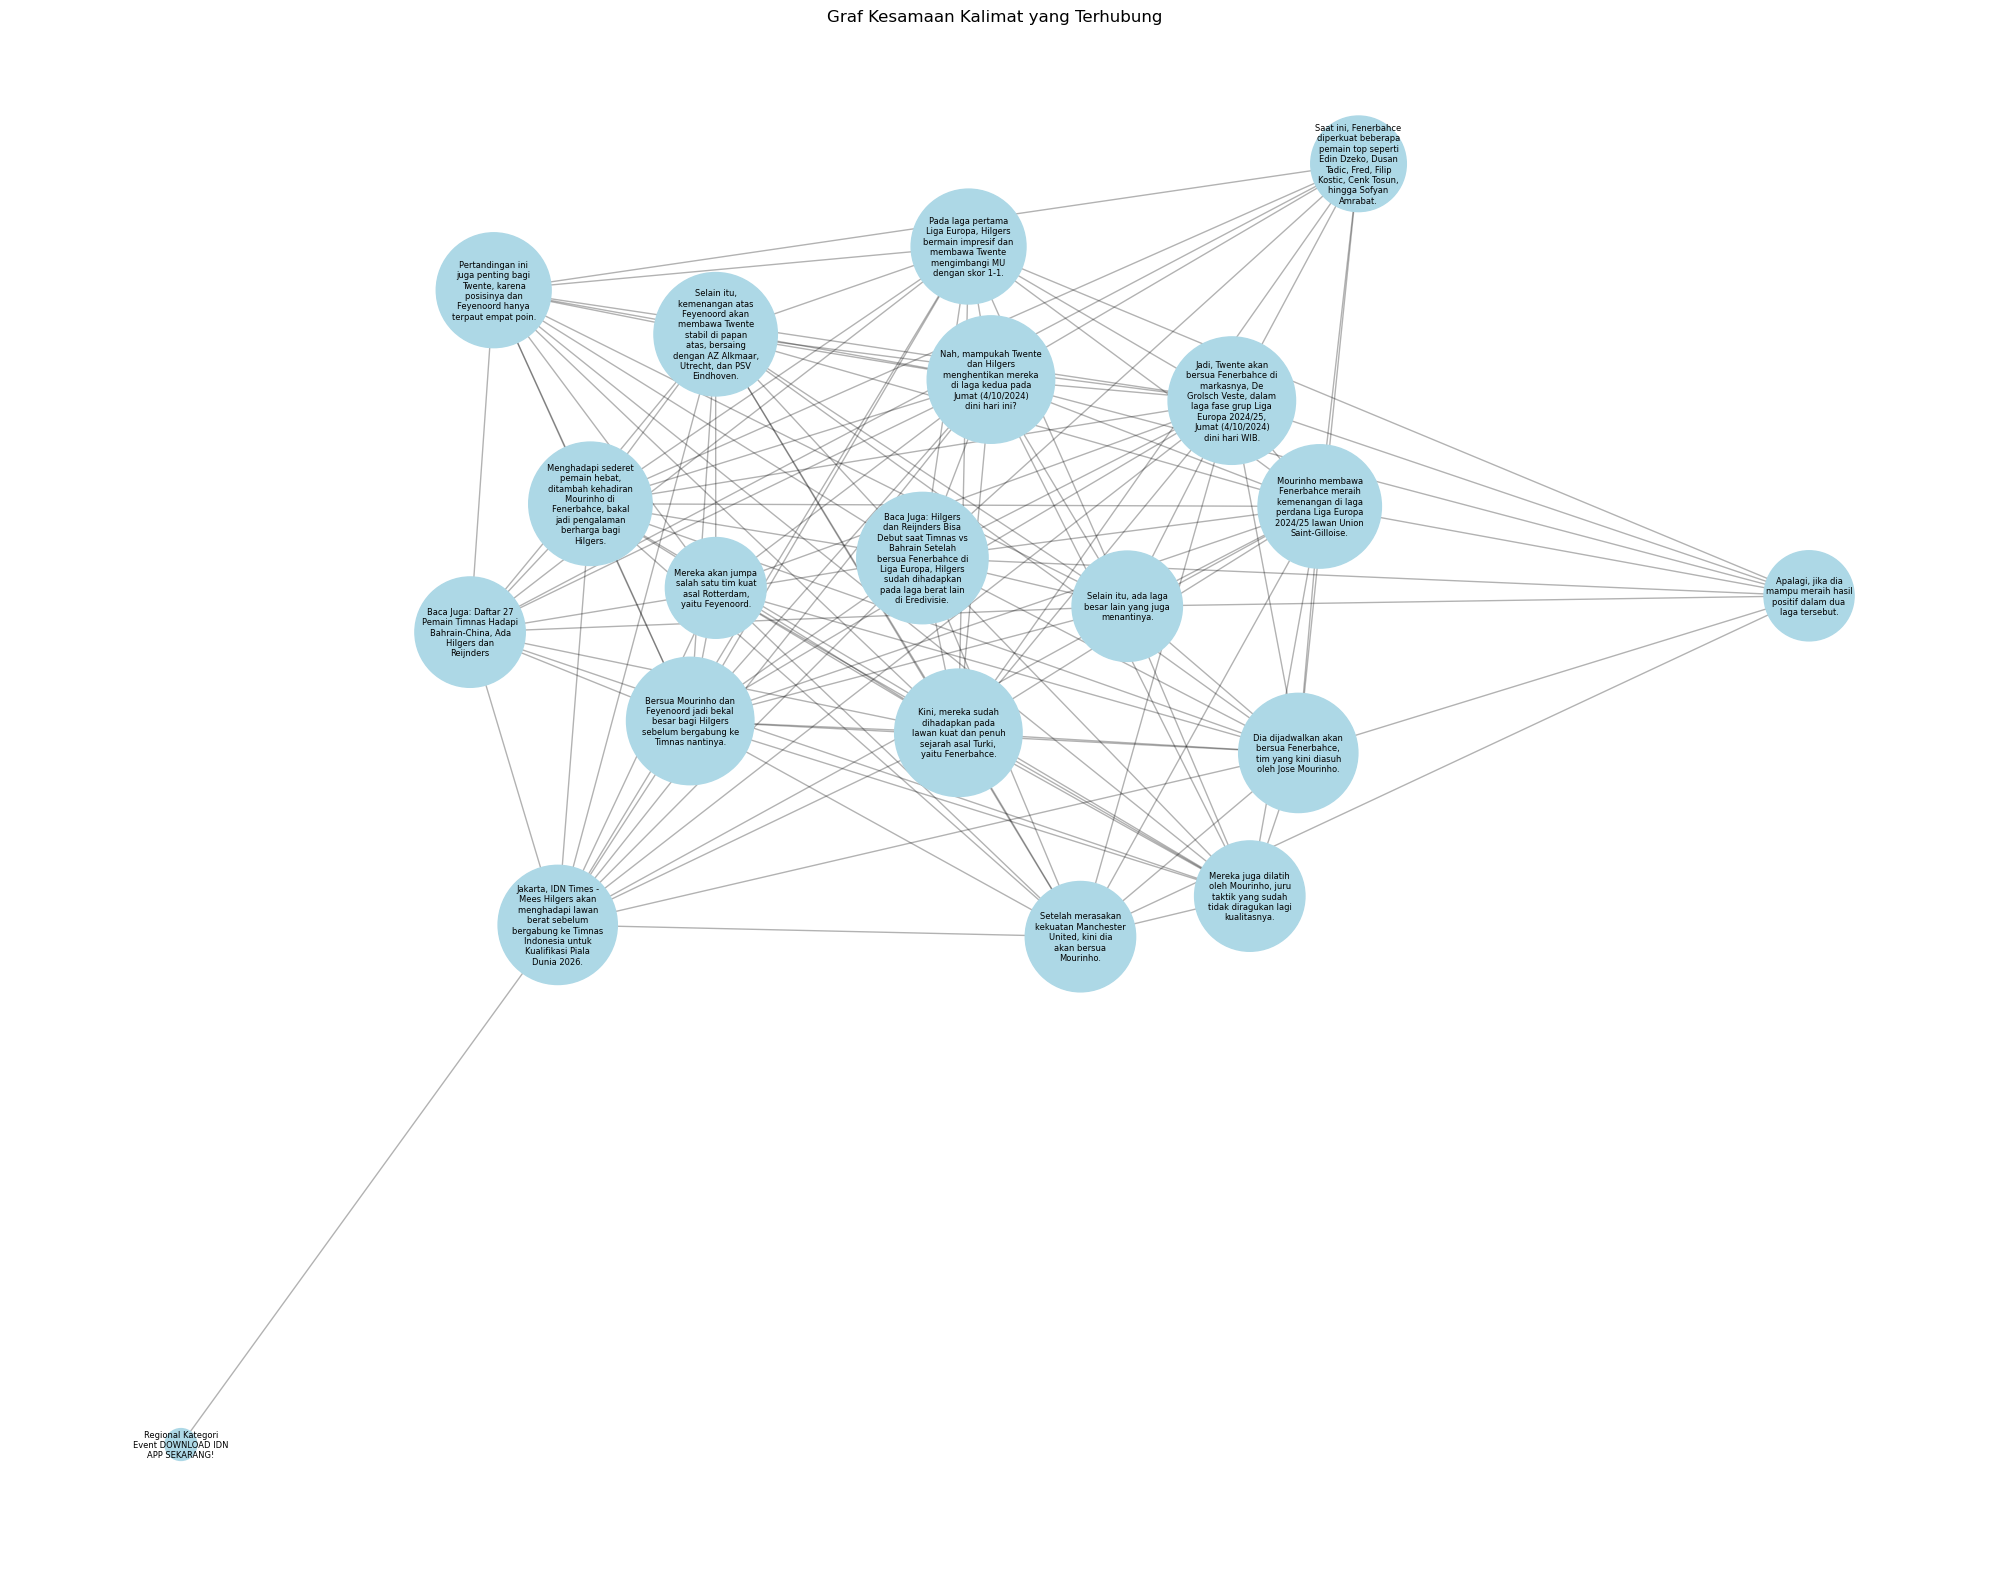

Jumlah node: 20
Jumlah edge: 128
Apakah graf terhubung? True

Ukuran Sentralitas:
                                              Kalimat  Degree Centrality  \
2   Baca Juga: Hilgers dan Reijnders Bisa Debut sa...           0.894737   
3   Bersua Mourinho dan Feyenoord jadi bekal besar...           0.842105   
5   Jadi, Twente akan bersua Fenerbahce di markasn...           0.842105   
7   Kini, mereka sudah dihadapkan pada lawan kuat ...           0.842105   
12  Nah, mampukah Twente dan Hilgers menghentikan ...           0.842105   
8   Menghadapi sederet pemain hebat, ditambah keha...           0.789474   
18  Selain itu, kemenangan atas Feyenoord akan mem...           0.789474   
11  Mourinho membawa Fenerbahce meraih kemenangan ...           0.789474   
4   Dia dijadwalkan akan bersua Fenerbahce, tim ya...           0.736842   
6   Jakarta, IDN Times - Mees Hilgers akan menghad...           0.736842   
14  Pertandingan ini juga penting bagi Twente, kar...           0.684211   
13  Pa

In [38]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
import textwrap

# Mengasumsikan kita sudah memiliki DataFrame tfidf_wide dan kalimat asli dari langkah sebelumnya
# Jika belum, Anda perlu menjalankan kode perhitungan TF-IDF terlebih dahulu

# Hitung kesamaan kosinus
cosine_sim = cosine_similarity(tfidf_wide)

# Buat DataFrame untuk matriks kesamaan
similarity_df = pd.DataFrame(cosine_sim, index=tfidf_wide.index, columns=tfidf_wide.index)

# Buat graf dari matriks kesamaan
G = nx.from_pandas_adjacency(similarity_df)

# Hapus self-loop
G.remove_edges_from(nx.selfloop_edges(G))

# Fungsi untuk mendapatkan komponen terbesar yang terhubung
def get_largest_component(G):
    return max(nx.connected_components(G), key=len)

# Pastikan graf terhubung
while not nx.is_connected(G):
    largest_component = get_largest_component(G)
    isolated_nodes = set(G.nodes()) - set(largest_component)
    if not isolated_nodes:
        break
    for node in isolated_nodes:
        similarities = [(other_node, similarity_df.loc[node, other_node]) 
                        for other_node in largest_component]
        most_similar_node = max(similarities, key=lambda x: x[1])[0]
        G.add_edge(node, most_similar_node)

# Fungsi untuk membungkus teks
def wrap_text(text, width=20):
    return '\n'.join(textwrap.wrap(text, width=width))

# Persiapkan label (kalimat yang dibungkus)
labels = {node: wrap_text(node) for node in G.nodes()}

# Sekarang kita visualisasikan graf
plt.figure(figsize=(20, 16))  # Perbesar ukuran gambar
pos = nx.spring_layout(G, k=0.5, iterations=50)

# Hitung ukuran node berdasarkan degree centrality
degree_centrality = nx.degree_centrality(G)
node_sizes = [v * 10000 for v in degree_centrality.values()]  # Perbesar ukuran node


# Gambar graf
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color='lightblue')
nx.draw_networkx_edges(G, pos, alpha=0.3)

# Tambahkan label
nx.draw_networkx_labels(G, pos, labels, font_size=6)  # Perkecil ukuran font

plt.title("Graf Kesamaan Kalimat yang Terhubung")
plt.axis('off')
plt.tight_layout()

# Simpan graf sebagai gambar
plt.savefig('connected_sentence_similarity_graph.png', dpi=300, bbox_inches='tight')

# Tampilkan plot
plt.show()

# Cetak beberapa informasi tentang graf
print(f"Jumlah node: {G.number_of_nodes()}")
print(f"Jumlah edge: {G.number_of_edges()}")
print(f"Apakah graf terhubung? {nx.is_connected(G)}")

# Hitung ukuran sentralitas
closeness_centrality = nx.closeness_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)

# Buat DataFrame dengan ukuran sentralitas
centrality_data = []
for node in G.nodes():
    centrality_data.append({
        'Kalimat': node,
        'Degree Centrality': degree_centrality[node],
        'Closeness Centrality': closeness_centrality[node],
        'Betweenness Centrality': betweenness_centrality[node]
    })

centrality_df = pd.DataFrame(centrality_data)

# Urutkan berdasarkan Degree Centrality
centrality_df = centrality_df.sort_values('Degree Centrality', ascending=False)

print("\nUkuran Sentralitas:")
print(centrality_df)

# Simpan ukuran sentralitas ke CSV
centrality_df.to_csv('centrality_measures_with_sentences.csv', index=False)

# Opsional, cetak 5 kalimat teratas berdasarkan setiap ukuran sentralitas
print("\n5 kalimat teratas berdasarkan Degree Centrality:")
print(centrality_df.nlargest(5, 'Degree Centrality')[['Kalimat', 'Degree Centrality']])

print("\n5 kalimat teratas berdasarkan Closeness Centrality:")
print(centrality_df.nlargest(5, 'Closeness Centrality')[['Kalimat', 'Closeness Centrality']])

print("\n5 kalimat teratas berdasarkan Betweenness Centrality:")
print(centrality_df.nlargest(5, 'Betweenness Centrality')[['Kalimat', 'Betweenness Centrality']])
